In [33]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

Automatically created module for IPython interactive environment


In [6]:
digits = datasets.load_digits()
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
#我们读的是8x8 images of digits，如果读图片可以用imread

In [26]:
images_and_labels = list(zip(digits.images, digits.target))#将8*8的图片数据和目标对应起来成为一个list
images_and_labels[:2]

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1)]

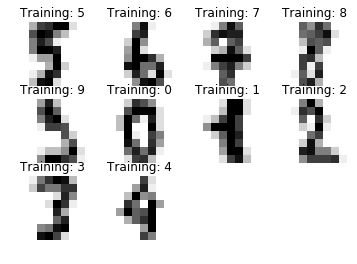

In [32]:
for index, (image, label) in enumerate(images_and_labels[15:25]):#list可以识别前面为image，后面为 lable  
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [37]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))#将(1797, 8, 8)转换成（1797,64）

In [39]:
#创建一个分类器
classifier = svm.SVC(gamma=0.001)
# We learn the digits on the first half of the digits 前一半作为训练集
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
# Now predict the value of the digit on the second half:后一半作为测试
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

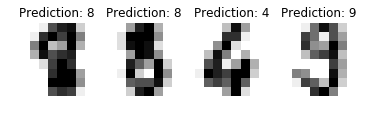

In [40]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()